In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

import warnings
# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv(r"diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [5]:
data.rename(columns = {'DiabetesPedigreeFunction':'DPF'}, inplace = True)
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'Outcome'],
      dtype='object')

In [6]:
identical = data[data.duplicated()]
 
print("Duplicate Rows :",identical)

Duplicate Rows : Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age, Outcome]
Index: []


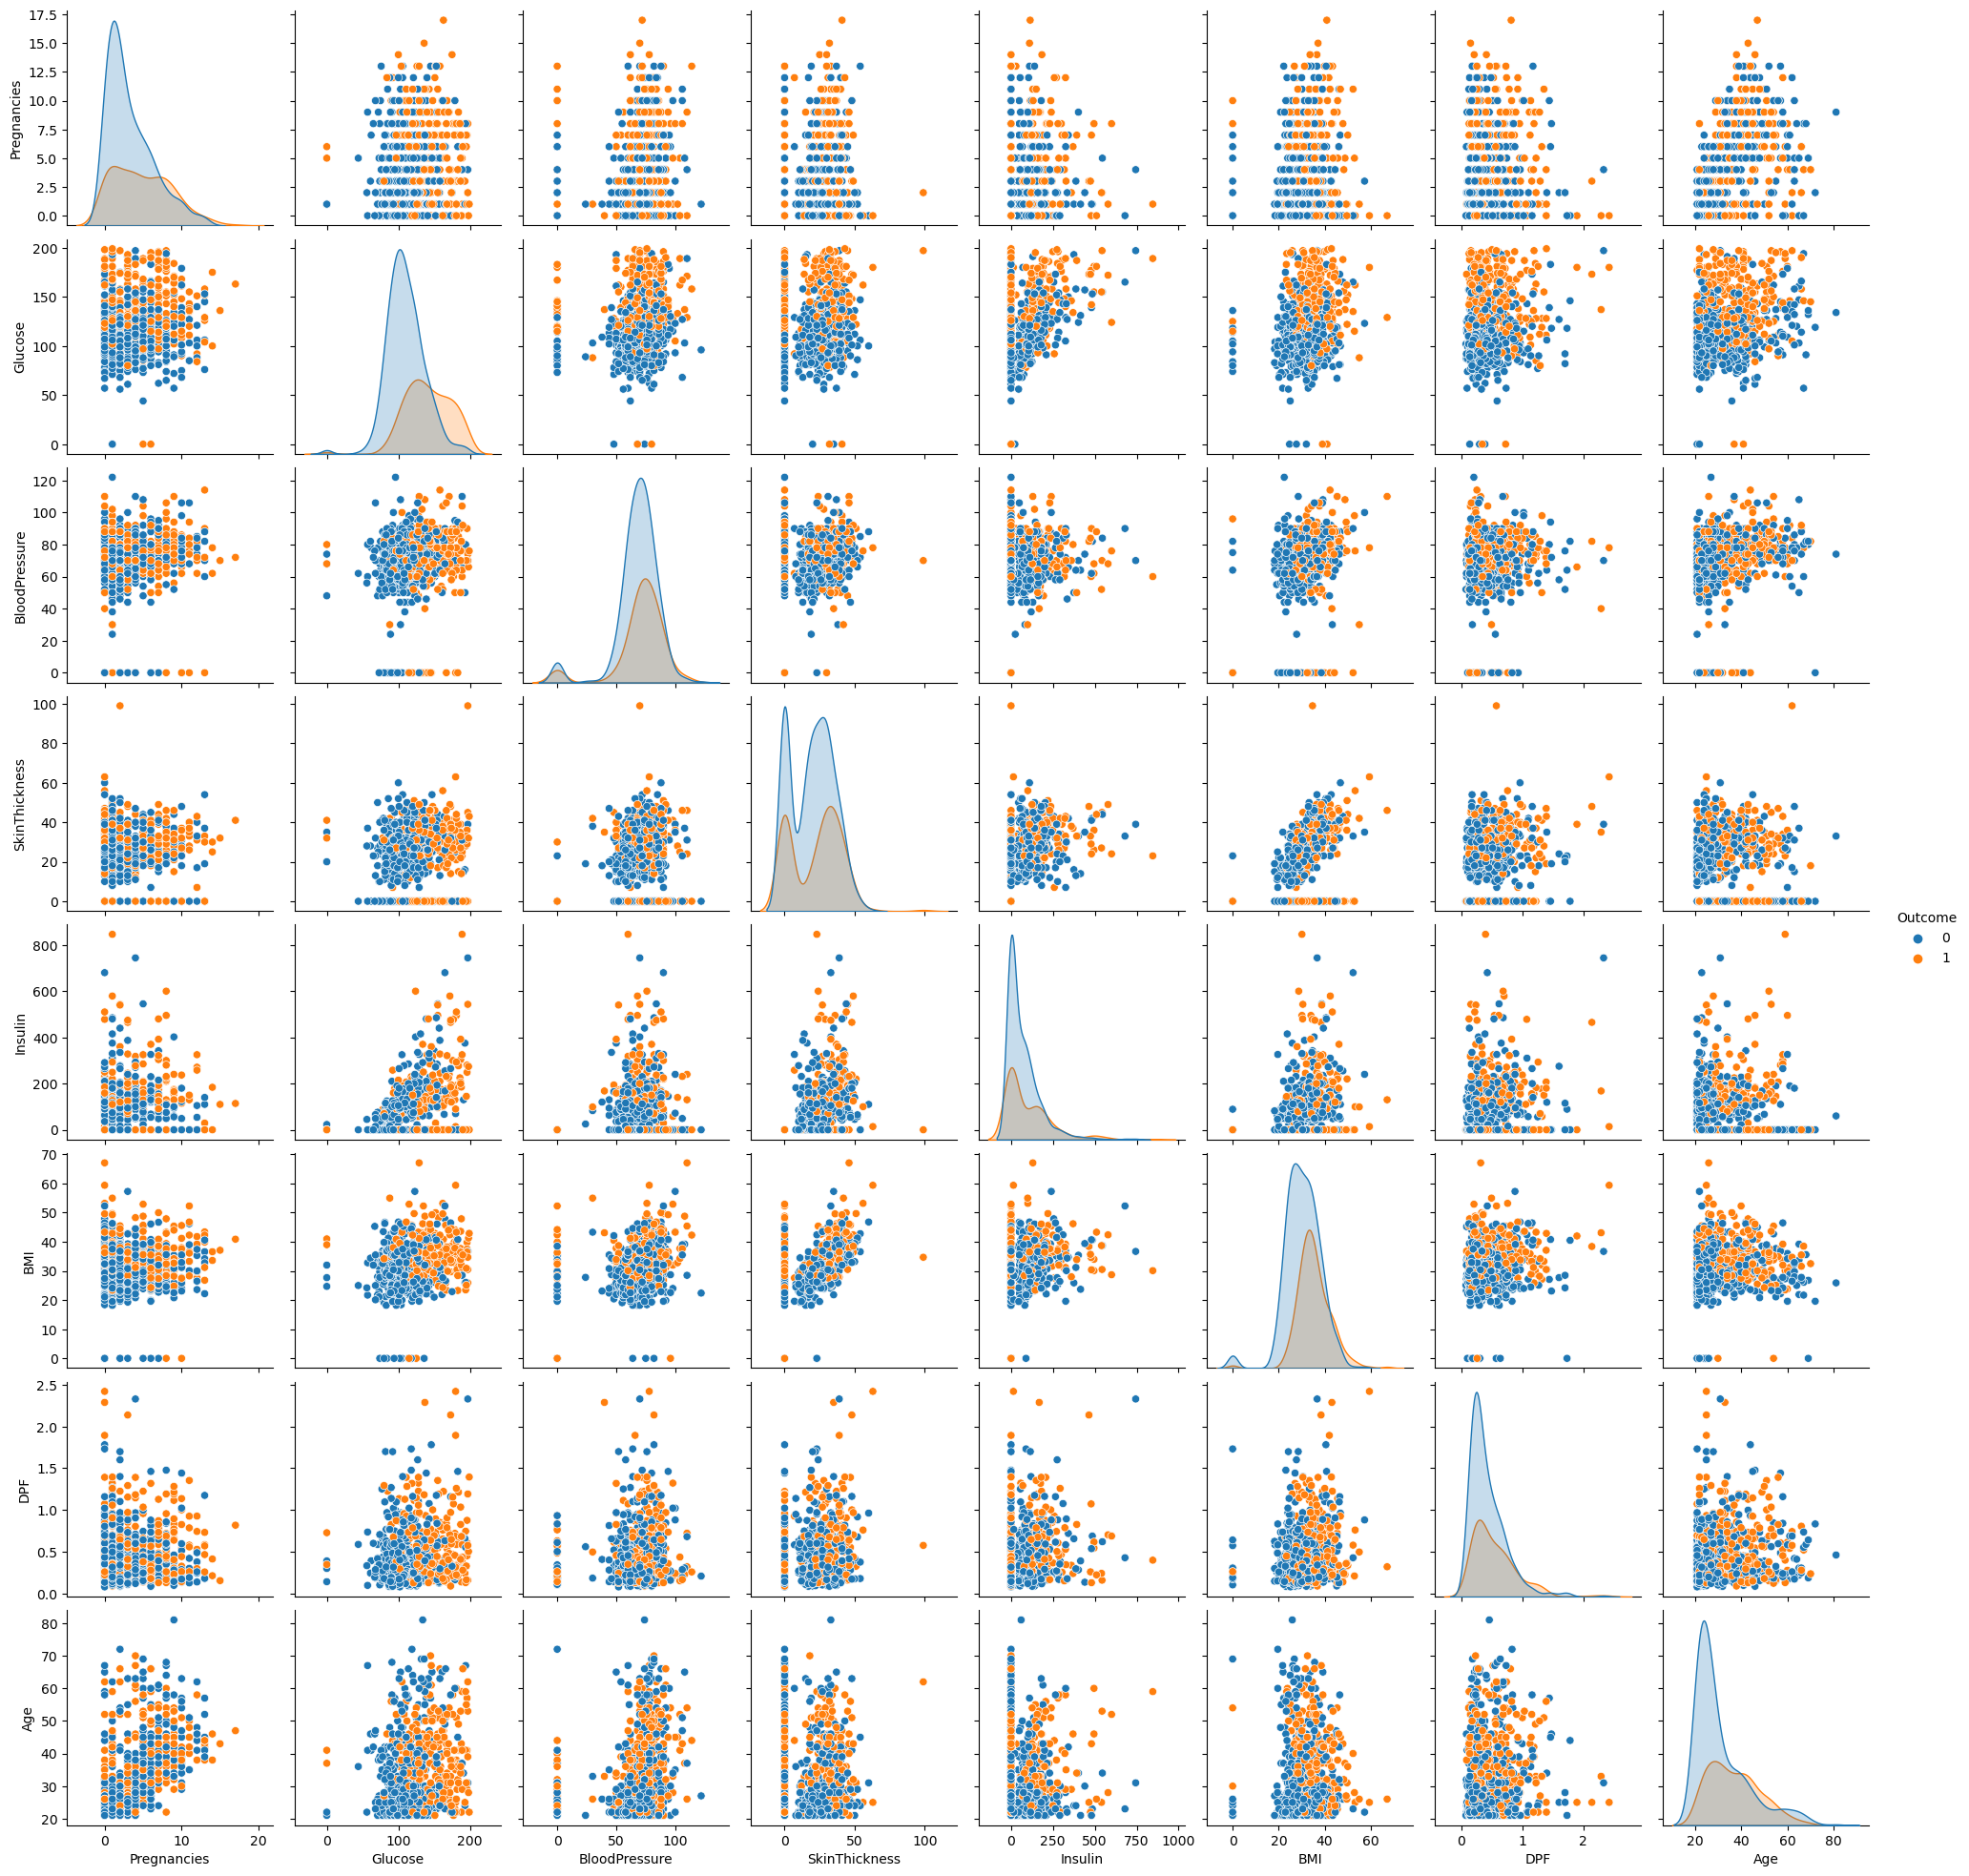

In [7]:
# Pairplot using seaborn
sns.pairplot(data, hue='Outcome', diag_kind='kde')
plt.show()

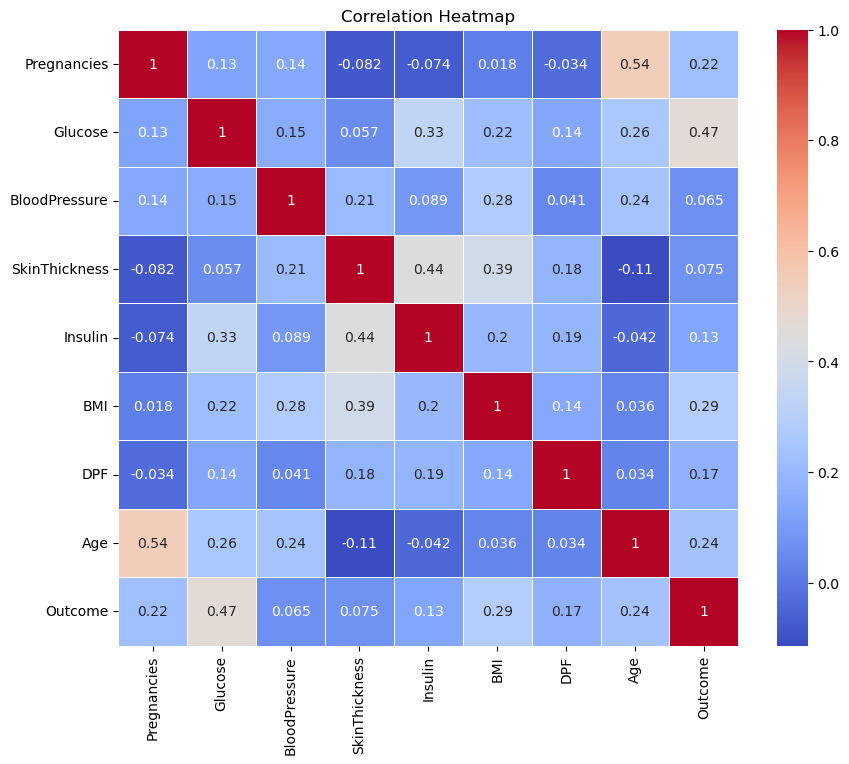

In [8]:
# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

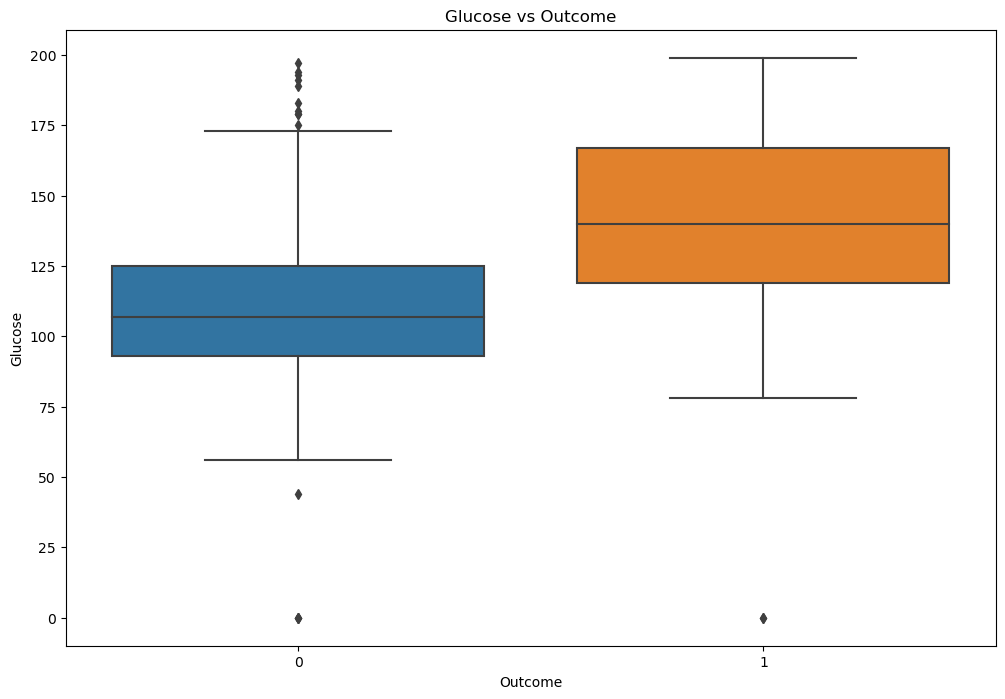

In [9]:
# Box plot for each feature
plt.figure(figsize=(12, 8))
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Glucose vs Outcome')
plt.show()

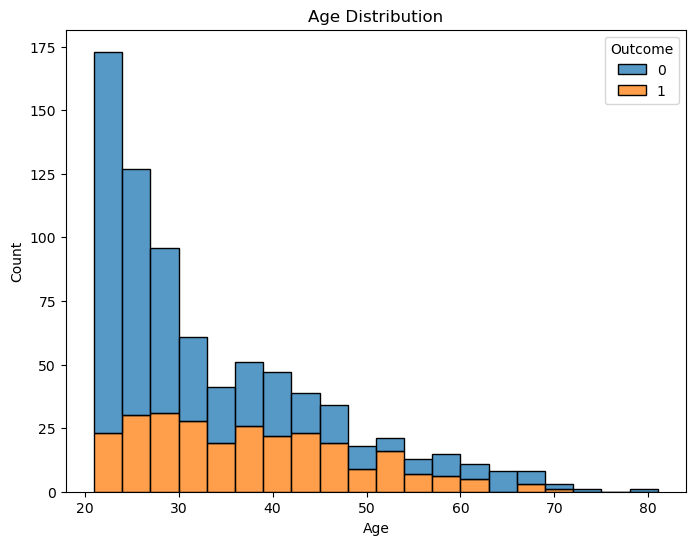

In [10]:
# Histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', bins=20, hue='Outcome', multiple='stack')
plt.title('Age Distribution')
plt.show()

In [11]:
data[['Glucose','BloodPressure','SkinThickness',
      'Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [12]:
data.isnull().sum()

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
DPF                0
Age                0
Outcome            0
dtype: int64

In [13]:
Mv = pd.DataFrame({"Count":data.isnull().sum(),"Percentage":round(100*data.isnull().sum()/data.count().max(), 2)})

Mv.T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
Count,0.0,5.00,35.00,227.00,374.0,11.00,0.0,0.0,0.0
Percentage,0.0,0.65,4.56,29.56,48.7,1.43,0.0,0.0,0.0


In [14]:
df = data.copy(deep=True)

In [15]:
#only keep rows with at least 70% non-NaN values
df=df.dropna(thresh=0.7*len(df.columns))

In [16]:
df.shape

(733, 9)

In [17]:
# List of columns with NaN values
nan_columns = df.columns[df.isnull().any(axis=0)]

# Fill NaN values with the mean of the respective Outcome groups
for col in nan_columns:
    for outcome in df['Outcome'].unique():
        mask = (df['Outcome'] == outcome) & df[col].isnull()
        mean_value = df.loc[mask, col].mean()
        df.loc[mask, col] = mean_value

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


### Split the dataset into training and testing

In [18]:
new_data = pd.read_csv(r"diabetes.csv")
x = new_data.drop(columns="Outcome")
y = new_data["Outcome"]

rs = 100     #set randome_state

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=rs, stratify=y)

### Write standard scaler from scratch - do not scale/z-score features using off-the-shelf Scaler from sklearn


In [19]:
# Standard Scaler implementation from scratch
class StandardScaler:
    def fit(self, X):
        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0)
        
    def transform(self, X):
        return (X - self.mean) / self.std

### Scale data using standard scaler


In [20]:
# Scaling the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
# Determine the best K value
best_k = 0
best_accuracy = 0
accuracy_values = []

In [22]:
for k in range(1, 21):  # Trying K values from 1 to 20
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train_scaled, y_train)
    y_pred = knn_classifier.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

### Determine the K value, and create a visualization of the accuracy. Report the best K value

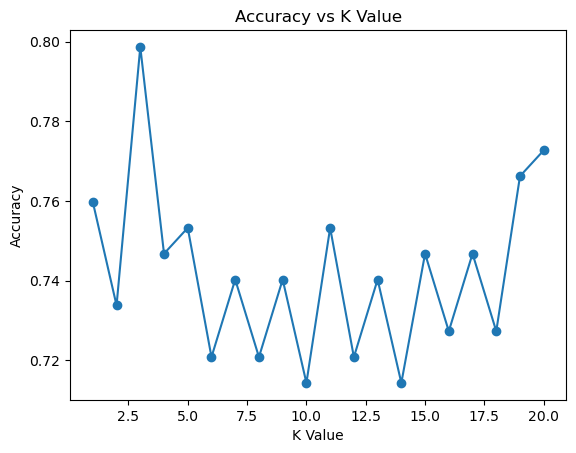

In [23]:
# Visualize the accuracy values for different K values
import matplotlib.pyplot as plt
plt.plot(range(1, 21), accuracy_values, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K Value')
plt.show()

In [24]:
print("Best K value:", best_k)

Best K value: 3


### Run 5 fold cross validations - report mean and standard deviation


In [25]:
# Convert DataFrames to NumPy arrays if needed
x_train_scaled = x_train_scaled.values
y_train = y_train.values

# 5-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=rs)
cross_val_accuracies = []

for train_idx, val_idx in kf.split(x_train_scaled):
    x_train_fold, x_val_fold = x_train_scaled[train_idx], x_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
    
    knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
    knn_classifier.fit(x_train_fold, y_train_fold)
    y_pred_fold = knn_classifier.predict(x_val_fold)
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    cross_val_accuracies.append(accuracy_fold)

mean_cross_val_accuracy = np.mean(cross_val_accuracies)
std_cross_val_accuracy = np.std(cross_val_accuracies)

print("Mean Cross Validation Accuracy:", mean_cross_val_accuracy)
print("Standard Deviation of Cross Validation Accuracy:", std_cross_val_accuracy)


Mean Cross Validation Accuracy: 0.718286018925763
Standard Deviation of Cross Validation Accuracy: 0.060340556916334054


### Evaluate using confusion matrix

In [26]:
# Evaluate using confusion matrix
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(x_train_scaled, y_train)
y_pred_test = knn_classifier.predict(x_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[87 13]
 [18 36]]


C:\Users\Tanmayee\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


### Use MARKDOWN cell to explain the accuracy of your model
The model's mean cross-validation accuracy is about 71.83%, and its standard deviation is about 6.03%. The K-Nearest Neighbours (KNN) classifier's performance on the dataset while employing a 5-fold cross-validation method is shown by the accuracy value. Let's examine the meaning of this accuracy value:

1) Mean Cross-Validation Accuracy (71.83%): According to this number, during cross-validation, the KNN classifier typically correctly predicts the class of about 71.83% of the samples in the dataset. In other words, the model achieves an average accuracy of 71.83% when it is trained and assessed several times using various subsets of the data.

2) Standard Deviation (6.03%): The standard deviation gives an indication of the range or variability of the accuracy readings acquired from cross-validation. The accuracy values produced in each fold of the cross-validation range more widely around the mean when the standard deviation is larger. In this instance, the model's performance appears to be rather consistent across folds, as indicated by the standard deviation's comparatively low value of 6.03%.

### retrain using leave-one-out cross validation - report mean and standard deviatio

In [27]:
# Leave-One-Out cross validation
loo = LeaveOneOut()
loo_accuracies = []

for train_idx, val_idx in loo.split(x_train_scaled):
    x_train_loo, x_val_loo = x_train_scaled[train_idx], x_train_scaled[val_idx]
    y_train_loo, y_val_loo = y_train[train_idx], y_train[val_idx]
    
    knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
    knn_classifier.fit(x_train_loo, y_train_loo)
    y_pred_loo = knn_classifier.predict(x_val_loo)
    accuracy_loo = accuracy_score(y_val_loo, y_pred_loo)
    loo_accuracies.append(accuracy_loo)

mean_loo_accuracy = np.mean(loo_accuracies)
std_loo_accuracy = np.std(loo_accuracies)

print("Mean LOO Cross Validation Accuracy:", mean_loo_accuracy)
print("Standard Deviation of LOO Cross Validation Accuracy:", std_loo_accuracy)

Mean LOO Cross Validation Accuracy: 0.7182410423452769
Standard Deviation of LOO Cross Validation Accuracy: 0.44985647426267755
